# **Laboratorium 4**
*Zastosowanie wzoru Taylora do rozwiązywania równań różniczkowych*

Wszystkie zadania dotyczące rozwiązywania równań różniczkowych po wstępnym zaimplementowaniu przetestowano na przykładach z Rysunku 1,
dla podanych warunków początkowych. Zostały tam przedstawione również
oczekiwane rozwiązania.
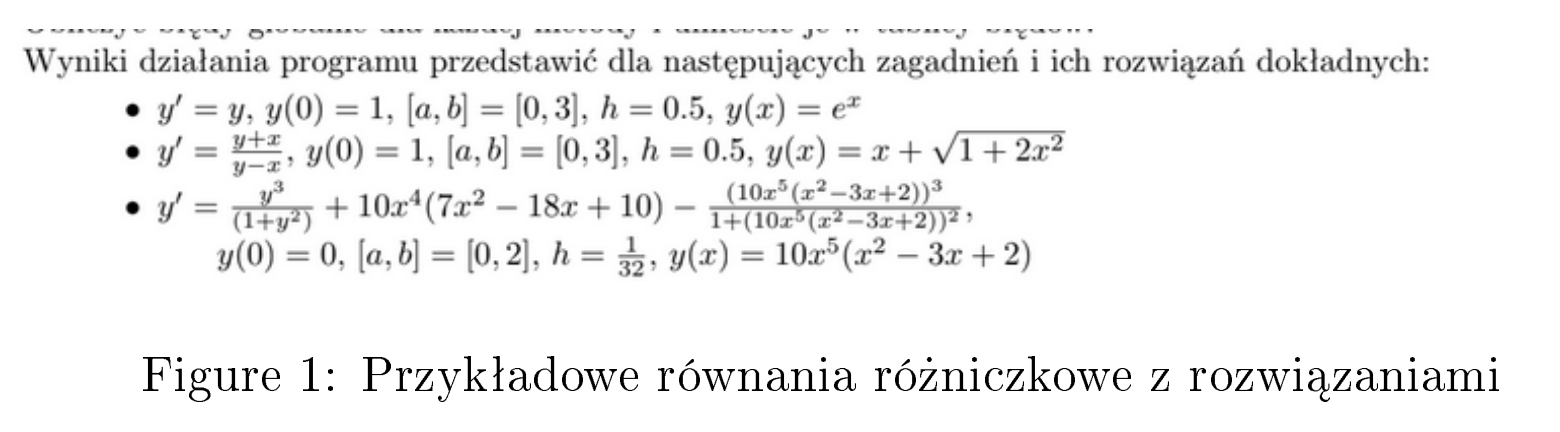

# Zadanie 1
*Implementacja metody Eulera*

Zaimplementowano funkcję rozwiązującą równanie różniczkowe metodą Eulera.

**Dane wejśiowe:**
* punkt początkowy x0 = 0
* wartość począ†kowa y0 = 0
* krok całkowania h = 0.1

**Dane wyjściowe:**
* pryzbliżone rozwiązanie w punkcie x1 = 1

In [1]:
def euler_step(x, y, h):
  y_next = y + h * f(x, y)
  x_next = x + h
  return x_next, y_next

Funkcja *euler_step* odpowiada za obliczenie pojedynczego kroku metody Eulera. Ale funkcja ta wykorzystuje *f(x, y)*, przy tym nie wiedząc, co to jest. Następnie zdefiniowano funkcję *f(x, y)*

In [2]:
def f(x, y):
  return x + y

Przechodzimy do przetestowania metody, zaczynając od podania poszczególnych parametrów:

In [3]:
x0 = 0    # punkt początkowy
y0 = 0    # wartość początkowa
h = 0.1   # krok całkowania
x_target = 1  # punkt docelowy

x, y = x0, y0
while x < x_target:
    x, y = euler_step(x, y, h)

print(f"Przybliżone rozwiązanie w x = {x_target}: {y}")

Przybliżone rozwiązanie w x = 1: 0.7531167061100001


Jak widać, metodę wywołano kilka razy, obliczenia są wykonywane iteracyjnie, ponieważ napisano metodę dla obliczenia pojedynczego kroku tej metody, a trzeba obliczyć przybliżoną wartość (nie następny krok).

# Zadanie 2
*Implementacja metody Taylora drugiego rzędu* \
Zaimplementowano funkcję rozwiązującą równanie różniczkowe metodą Taylora
drugiego rzędu:

**Dane wejściowe**:
* punkt początkowy x0 = 0
* wartość początkowa y0 = 1
* krok całkowania h = 0.1

**Dane wyjściowe**:
* przybliżone rozwiązanie w punkcie x = 1



In [4]:
def taylor_step(x, y, h):
    f_xy = x + y                                   # dy/dx = x + y
    f_prime_xy = 1 + f_xy                          # d^2y/dx^2 = 1 + (x + y)
    y_next = y + h * f_xy + (h**2 / 2) * f_prime_xy
    x_next = x + h
    return x_next, y_next

Funkcja *taylor_step()* odpowiada za obliczenie pojedynczego kroku metody Taylora drugiego rzędu. \
Jest zdefiniowana i zaimplementowana, zostało tylko ją przetestować:

In [5]:
x0 = 0        # punkt początkowy
y0 = 1        # wartość początkowa
h = 0.1       # krok całkowania
x_target = 1  # punkt docelowy

# Iteracyjne obliczenie wyniku (bo znów mamy tylko 1 krok)
x, y = x0, y0
while x < x_target:
    x, y = taylor_step(x, y, h)

print(f"Przybliżone rozwiązanie w x = {x_target}: {y}")

Przybliżone rozwiązanie w x = 1: 3.8981186710041773


# Zadanie 3
*Porownanie dokładności metod Eulera i Taylora* \
Porównano rozwiązania uzyskane metodą Eulera oraz metodą Taylora drugiego
rzędu.

**Dane wejściowe**:
* równanie różniczkowe dy/dx = x + y, y(0) = 1
* różne kroki całkowania h = 0.2, h = 0.1, h = 0.05
* oblicz rozwiązanie do x = 1

**Dane wyjściowe**:
* tabela wyników dla każdej metody i kroku całkowania
* wykres rozwiązań numerycznych w porównaniu do rozwiązania dokładnego

Zaimportowanie niezbędnych bibliotek:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Zaimplementowano funkcję obliczającą rozwiązanie dokładne, z którym potem będą porównywane otrzymane metodą Eulera i Taylora rozwiązania.

In [7]:
def exact_solution(x):
    return (1 - x) * np.exp(x) + x

W tym zadaniu postanowiłam nie pisać funkcji tylko i wyłacznie dla jednego kroku metody Eulera, więć zaimplementowano funkcję, będącą algorytmem Eulera:

In [8]:
def euler_method(f, x0, y0, h, x_target):
    x, y = x0, y0
    results = [(x, y)]
    while x < x_target:
        y += h * f(x, y)
        x += h
        results.append((x, y))
    return results

W tym zadaniu postanowiłam nie pisać funkcji tylko i wyłacznie dla jednego kroku metody Taylora drugiego rzędu, więć zaimplementowano funkcję, będącą algorytmem Taylora drugiego rzędu:

In [9]:
def taylor_method(x0, y0, h, x_target):
    x, y = x0, y0
    results = [(x, y)]
    while x < x_target:
        f_xy = x + y
        f_prime_xy = 1 + f_xy
        y += h * f_xy + (h**2 / 2) * f_prime_xy
        x += h
        results.append((x, y))
    return results

Obie funkcje (*euler_method()* i *taylor_method()*) wykorzystują w obliczeniach funkcję *f(x, y)*, o której algorytmy te nic nie wiedzą. Następnie zaimplementowano funkcję *f(x, y)* używaną przez metodę Eulera i metodę Taylora:

In [10]:
def f(x, y):
  return x + y

Następnie podano wszystkie niezbędne do przetestowania funkcji paranetry:

In [11]:
x0 = 0
y0 = 1
h_values = [0.2, 0.1, 0.05]
x_target = 1

Porównanie wyników otrzymanych metodą Eulera i metodą Taylora:

In [12]:
euler_results = {h: euler_method(f, x0, y0, h, x_target) for h in h_values}
taylor_results = {h: taylor_method(x0, y0, h, x_target) for h in h_values}

Tworzenie tabeli wyników obliczeń:

In [14]:
print("\nPorównanie wyników:")
print("h | Euler | Taylor | Dokładne")
print("----------------------------------")
for h in h_values:
    for i, (x, y_euler) in enumerate(euler_results[h]):
        _, y_taylor = taylor_results[h][i]
        y_exact = exact_solution(x)
        print(f"{h:.2f} | {y_euler:.5f} | {y_taylor:.5f} | {y_exact:.5f}")


Porównanie wyników:
h | Euler | Taylor | Dokładne
----------------------------------
0.20 | 1.00000 | 1.00000 | 1.00000
0.20 | 1.20000 | 1.24000 | 1.17712
0.20 | 1.48000 | 1.57680 | 1.29509
0.20 | 1.85600 | 2.03170 | 1.32885
0.20 | 2.34720 | 2.63067 | 1.24511
0.20 | 2.97664 | 3.40542 | 1.00000
0.10 | 1.00000 | 1.00000 | 1.00000
0.10 | 1.10000 | 1.11000 | 1.09465
0.10 | 1.22000 | 1.24205 | 1.17712
0.10 | 1.36200 | 1.39847 | 1.24490
0.10 | 1.52820 | 1.58180 | 1.29509
0.10 | 1.72102 | 1.79489 | 1.32436
0.10 | 1.94312 | 2.04086 | 1.32885
0.10 | 2.19743 | 2.32315 | 1.30413
0.10 | 2.48718 | 2.64558 | 1.24511
0.10 | 2.81590 | 3.01236 | 1.14596
0.10 | 3.18748 | 3.42816 | 1.00000
0.10 | 3.60623 | 3.89812 | 0.79958
0.05 | 1.00000 | 1.00000 | 1.00000
0.05 | 1.05000 | 1.05250 | 1.04871
0.05 | 1.10500 | 1.11025 | 1.09465
0.05 | 1.16525 | 1.17353 | 1.13756
0.05 | 1.23101 | 1.24261 | 1.17712
0.05 | 1.30256 | 1.31779 | 1.21302
0.05 | 1.38019 | 1.39939 | 1.24490
0.05 | 1.46420 | 1.48774 | 1.27239
0.05

Tworzenie wykresu porównania wartości uzyskanych metodą Eulera i metodą Taylora z rozwiązaniem dokładnym:

<ipython-input-15-d1a90e70d3e6>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_taylor, y_taylor, 's-', label=f"Taylor (h={h})", linestyle='dashed', color=colors[i])


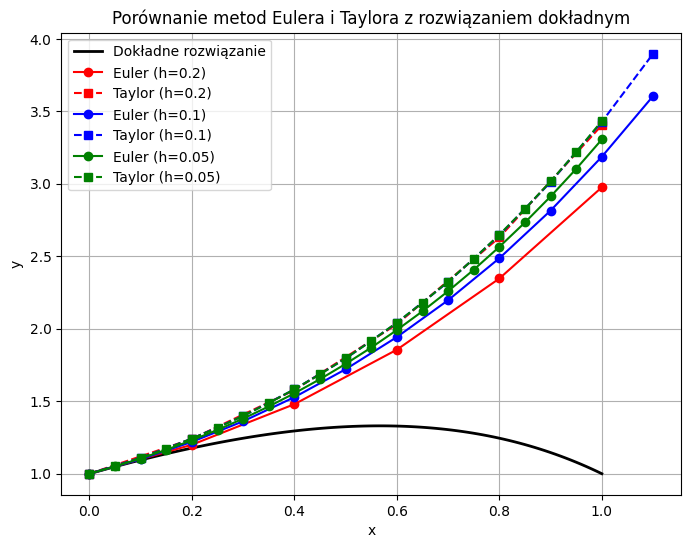

In [15]:
x_exact = np.linspace(0, 1, 100)
y_exact = exact_solution(x_exact)

plt.figure(figsize=(8, 6))
plt.plot(x_exact, y_exact, label="Dokładne rozwiązanie", color='black', linewidth=2)

colors = ['red', 'blue', 'green']
for i, h in enumerate(h_values):
    x_euler, y_euler = zip(*euler_results[h])
    x_taylor, y_taylor = zip(*taylor_results[h])
    plt.plot(x_euler, y_euler, 'o-', label=f"Euler (h={h})", color=colors[i])
    plt.plot(x_taylor, y_taylor, 's-', label=f"Taylor (h={h})", linestyle='dashed', color=colors[i])

plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie metod Eulera i Taylora z rozwiązaniem dokładnym")
plt.legend()
plt.grid()
plt.show()

# Zadanie 4
*Iteracyjne rozwiązanie na całym przedziale*

Rozwiązano to samo równanie różniczkowe iteracyjnie na przedziale [0, 1] dla kroku całkowania h = 0.1. \
**Dane wejściowe**:
* warunki początkowe: x0 = 0, y0 = 1
* krok całkowania h = 0.1 \

**Dane wyjściowe**:
* tabela wartości (x, y) dla xc{0, 0.1, 0.2, ..., 1.0}

In [16]:
import numpy as np

Funkcja odpowiadająca za obliczanie dokładnej wartości, z którą można będzie porównać rozwiązanie uzyskane metodą Taylora:

In [17]:
def exact_solution(x):
    return (1 - x) * np.exp(x) + x

Funkcja opisująca algorytm obliczania jednego kolejnego kroku metody Taylora:

In [18]:
def taylor_step(x, y, h):
    f_xy = x + y
    f_prime_xy = 1 + f_xy
    return y + h * f_xy + (h**2 / 2) * f_prime_xy

Metoda Taylora (oblicza się krok aż do końca przedziału i inicjalizuje się tabelę wyników):

In [19]:
def taylor_iteration(x0, y0, h, x_end):
    x, y = x0, y0
    results = [(x, y)]  # Inicjalizacja tabeli wyników

    while x < x_end:
        y = taylor_step(x, y, h)  # Wykonujemy krok Taylora
        x += h  # Aktualizujemy x
        results.append((x, y))  # Zapisujemy wynik

    return results

Na samym końcu przetestowano zaimplementowane funkcje:

In [20]:
x0 = 0
y0 = 1
h = 0.1
x_end = 1

taylor_results = taylor_iteration(x0, y0, h, x_end)

# Wyświetlenie tabeli
print("\nTabela wartości:")
print("x     | Taylor  | Exact")
print("----------------------------------")
for x, y_taylor in taylor_results:
    y_exact = exact_solution(x)
    print(f"{x:.1f}  | {y_taylor:.5f} | {y_exact:.5f}")



Tabela wartości:
x     | Taylor  | Exact
----------------------------------
0.0  | 1.00000 | 1.00000
0.1  | 1.11000 | 1.09465
0.2  | 1.24205 | 1.17712
0.3  | 1.39847 | 1.24490
0.4  | 1.58180 | 1.29509
0.5  | 1.79489 | 1.32436
0.6  | 2.04086 | 1.32885
0.7  | 2.32315 | 1.30413
0.8  | 2.64558 | 1.24511
0.9  | 3.01236 | 1.14596
1.0  | 3.42816 | 1.00000
1.1  | 3.89812 | 0.79958


# Zadanie 5
*Wpływ kroku całkowania na dokładność*\
Przetestowano implementację dla różnych wartości kroku całkowania: \
h = 0.2, h = 0.1, h = 0.05 \
**Dane wejściowe**:
* warunek początkowy: y(0) = 1
* punkt końcowy: x = 1, różne wartości h

**Dane wyjściowe**:
* tabela wartości y(1) dla każdego kroku całkowania
* komentarz dotyczący tego, jak zmniejszanie kroku wpływa na dokładność rozwiązania

In [21]:
import numpy as np

Funkcja obliczająca dokładną wartość:

In [22]:
def exact_solution(x):
    return (1 - x) * np.exp(x) + x

Funkcja obliczająca jeden krok metody Taylora drugiego rzędu:

In [23]:
def taylor_step(x, y, h):
    f_xy = x + y
    f_prime_xy = 1 + f_xy
    return y + h * f_xy + (h**2 / 2) * f_prime_xy

Funkcja implementująca metodę Taylora:

In [24]:
def taylor_iteration(x0, y0, h, x_end):
    x, y = x0, y0
    results = [(x, y)]            # Inicjalizacja tabeli wyników

    while x < x_end:
        y = taylor_step(x, y, h)  # Wykonanie kroku Taylora
        x += h                    # Aktualizacja x
        results.append((x, y))    # Zapis wyniku

    return results

Testowanie:

In [25]:
x0 = 0
y0 = 1
h_values = [0.2, 0.1, 0.05]
x_end = 1

results = {h: taylor_iteration(x0, y0, h, x_end) for h in h_values}

# Wyświetlenie tabeli wyników
print("\nWpływ kroku całkowania na dokładność:")
print("h     | y(1) Taylor  | y(1) Dokładne  | Błąd")
print("------------------------------------------------")
for h in h_values:
    y_taylor = results[h][-1][1]  # Ostatnia wartość y dla danego h
    y_exact = exact_solution(x_end)
    error = abs(y_taylor - y_exact)
    print(f"{h:.2f}  | {y_taylor:.5f}      | {y_exact:.5f}      | {error:.5f}")


Wpływ kroku całkowania na dokładność:
h     | y(1) Taylor  | y(1) Dokładne  | Błąd
------------------------------------------------
0.20  | 3.40542      | 1.00000      | 2.40542
0.10  | 3.89812      | 1.00000      | 2.89812
0.05  | 3.43438      | 1.00000      | 2.43438


#####Wnioski:
Zmniejszanie kroku całkowania h **poprawia dokładność metody Taylora**. Dla mniejszych wartości h błąd numeryczny jest mniejszy, ale *kosztem większej liczby iteracji*.

# Zadanie 6
*Implementacja ogólnej metody Taylora*\
Rozbudowano funkcję TaylorStep w taki sposób, aby obsługiwała ogólny, zadany rząd rozwinięcia Taylora (np. od 1 do 4).\
**Dane wejściowe**:
* punkt początkowy x0 = 0, wartość początkowa y0 = 1
* rząd metody (np. n = 3), krok całkowania h = 0.1, wartość końcowa x = 1

**Dane wyjściowe**:
* wartość y w punkcie x = 1, obliczona dla rozwinięcia Taylora danego rzędu.

In [26]:
import numpy as np
import math

Funkcja obliczająca dokładną wartość:

In [27]:
def exact_solution(x):
    return (1 - x) * np.exp(x) + x

Funkcja odpowiadająca za obliczanie pochodnych:

In [28]:
def compute_derivatives(x, y, order_n):
    derivatives = [y + x]  # Pierwsza pochodna dy/dx = x + y
    for k in range(1, order_n):
        derivatives.append(1 + derivatives[-1])  # Kolejne pochodne
    return derivatives

Ogólna metoda kroku metody Taylora w postaci funkcji *taylor_step_general()*:

In [29]:
def taylor_step_general(x, y, h, order_n):
    result = y
    derivatives = compute_derivatives(x, y, order_n)
    for k in range(1, order_n + 1):
        result += (h**k / math.factorial(k)) * derivatives[k - 1]
    return result

Ogólna metoda Taylora, obliczająca każdy jej krok i inicjalizująca tabelę wyników:

In [30]:
def taylor_iteration_general(x0, y0, h, x_end, order_n):
    x, y = x0, y0
    results = [(x, y)]  # Inicjalizacja tabeli wyników

    while x < x_end:
        y = taylor_step_general(x, y, h, order_n)  # Wykonanie kroku Taylora
        x += h  # Aktualizacja x
        results.append((x, y))  # Zapis wyniku

    return results

Testowanie zaimplementowanej metody:

In [33]:
x0 = 0
y0 = 1
h = 0.1
x_end = 1
orders = [1, 2, 3, 4]

results = {n: taylor_iteration_general(x0, y0, h, x_end, n) for n in orders}

# Wyświetlenie tabeli wyników
print("\nWpływ rzędu metody Taylora na dokładność:")
print("Rząd  | y(1) Taylor  | y(1) Dokładne  | Błąd")
print("------------------------------------------------")
for n in orders:
    y_taylor = results[n][-1][1]
    y_exact = exact_solution(x_end)
    error = abs(y_taylor - y_exact)
    print(f"{n}     | {y_taylor:.5f}      | {y_exact:.5f}      | {error:.5f}")


Wpływ rzędu metody Taylora na dokładność:
Rząd  | y(1) Taylor  | y(1) Dokładne  | Błąd
------------------------------------------------
1     | 3.60623      | 1.00000      | 2.60623
2     | 3.89812      | 1.00000      | 2.89812
3     | 3.91125      | 1.00000      | 2.91125
4     | 3.91166      | 1.00000      | 2.91166



#### Wnioski:
Zwiększanie rzędu metody Taylora **poprawia dokładność rozwiązania**.
Dla wyższych rzędów metoda *lepiej odwzorowuje rozwiązanie analityczne, redukując błąd numeryczny*.